In [52]:
import contextlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns

data = pd.read_csv("./ЛР_3/Data_Lab3/data2.txt", sep="\t", header=None)


@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


def prety_print(mtx, precision=3, suppress=True): 
    with printoptions(precision=precision, suppress=suppress):
        print(mtx)
        
        
data.head()
        

,0,1,2,3,4,5,6,7
0,10,10,9,9,9,9,10,9
1,6,2,4,4,7,5,7,6
2,7,6,7,5,5,5,8,7
3,7,6,7,5,6,5,8,7
4,10,10,9,9,9,9,10,9


In [53]:
X = data.values
N, K = X.shape
X.shape

(100, 8)

In [54]:
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0, ddof=1)
X_std = (X - mean_X) / std_X

R = np.dot(X_std.T, X_std) / (N - 1)
print("\nКорреляционная матрица R:")

prety_print(R)

# d = N * sum(r_ij^2) для i < j.
d_stat = 0
for i in range(K):
    for j in range(i+1, K):
        d_stat += R[i, j]**2

d_stat *= N
degrees_of_freedom = K * (K - 1) / 2
critical_value = chi2.ppf(0.95, df=degrees_of_freedom) 

print("\nСтатистика d =", d_stat)
print("Критическое значение χ² с", int(degrees_of_freedom), "степенями свободы (при α = 0.05) =", critical_value)
if d_stat > critical_value:
    print("Корреляционная матрица значимо отличается от единичной. Можно применять метод главных компонент.\n")
else:
    print("Корреляционная матрица не отличается значимо от единичной. Применение метода может быть нецелесообразно.\n")

eigenvalues, eigenvectors = np.linalg.eig(R)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print("Собственные значения:")
prety_print(eigenvalues)
print("\nМатрица собственных векторов A (столбцы – главные компоненты):")
prety_print(eigenvectors)


Корреляционная матрица R:
[[1.    0.945 0.861 0.918 0.654 0.89  0.916 0.952]
 [0.945 1.    0.929 0.864 0.534 0.841 0.941 0.94 ]
 [0.861 0.929 1.    0.717 0.296 0.678 0.843 0.858]
 [0.918 0.864 0.717 1.    0.849 0.973 0.924 0.906]
 [0.654 0.534 0.296 0.849 1.    0.87  0.682 0.648]
 [0.89  0.841 0.678 0.973 0.87  1.    0.916 0.883]
 [0.916 0.941 0.843 0.924 0.682 0.916 1.    0.908]
 [0.952 0.94  0.858 0.906 0.648 0.883 0.908 1.   ]]

Статистика d = 1974.2013765158206
Критическое значение χ² с 28 степенями свободы (при α = 0.05) = 41.33713815142739
Корреляционная матрица значимо отличается от единичной. Можно применять метод главных компонент.

Собственные значения:
[6.83  0.901 0.107 0.049 0.041 0.028 0.023 0.022]

Матрица собственных векторов A (столбцы – главные компоненты):
[[ 0.371  0.106  0.442 -0.659 -0.321  0.072  0.06  -0.331]
 [ 0.365  0.277 -0.105  0.068 -0.478 -0.129 -0.443  0.577]
 [ 0.323  0.54  -0.113 -0.11   0.684  0.189 -0.267 -0.067]
 [ 0.371 -0.215 -0.01  -0.194  0.261

Определить относительную долю разброса, приходящуюся на
главные компоненты.

In [55]:
# относительную долю разброса (explained variance ratio)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Относительная доля разброса (explained variance ratio) для главных компонент:")
prety_print(explained_variance_ratio)

for i in range(K):
        print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({cumulative_variance[i]:.4f} cumulative)")
    

Относительная доля разброса (explained variance ratio) для главных компонент:
[0.854 0.113 0.013 0.006 0.005 0.003 0.003 0.003]
PC1: 0.8538 (0.8538 cumulative)
PC2: 0.1126 (0.9664 cumulative)
PC3: 0.0134 (0.9798 cumulative)
PC4: 0.0061 (0.9859 cumulative)
PC5: 0.0051 (0.9910 cumulative)
PC6: 0.0034 (0.9944 cumulative)
PC7: 0.0029 (0.9973 cumulative)
PC8: 0.0027 (1.0000 cumulative)


In [56]:
Z = np.dot(X_std, eigenvectors)
print("\nПроекции объектов на главные компоненты (первые 5 наблюдений):")
prety_print(Z[:5, :])



Проекции объектов на главные компоненты (первые 5 наблюдений):
[[ 5.155  0.09  -0.131 -0.333 -0.172 -0.084  0.01   0.092]
 [-2.627 -1.548 -0.131  0.089 -0.017 -0.11   0.226 -0.414]
 [-0.462  0.983 -0.359  0.097 -0.069 -0.126  0.211  0.124]
 [-0.297  0.579 -0.333  0.109  0.002  0.135 -0.057  0.13 ]
 [ 5.155  0.09  -0.131 -0.333 -0.172 -0.084  0.01   0.092]]


In [57]:
cov_Z = np.dot(Z.T, Z) / (N - 1)
print("\nМатрица ковариаций для проекций на главные компоненты:")
print(cov_Z)


Матрица ковариаций для проекций на главные компоненты:
[[ 6.83046759e+00  1.40796216e-15  7.78313493e-16 -9.81889984e-17
   1.32007031e-15  1.26833446e-15 -9.33608440e-16  1.06327497e-15]
 [ 1.40796216e-15  9.00820543e-01 -2.00974636e-17  7.16525989e-16
  -4.12142844e-16 -6.16830101e-16  2.59480792e-16  1.79292280e-16]
 [ 7.78313493e-16 -2.00974636e-17  1.07129806e-01 -7.52324225e-16
  -1.50184909e-15  3.48473844e-16  6.09946306e-16  2.08497617e-16]
 [-9.81889984e-17  7.16525989e-16 -7.52324225e-16  4.88223694e-02
   2.66656673e-15 -2.81436211e-16  7.34824920e-17 -1.03920348e-15]
 [ 1.32007031e-15 -4.12142844e-16 -1.50184909e-15  2.66656673e-15
   4.05818048e-02 -1.56435563e-16  3.49129342e-16 -4.80658709e-16]
 [ 1.26833446e-15 -6.16830101e-16  3.48473844e-16 -2.81436211e-16
  -1.56435563e-16  2.75207665e-02  6.30135974e-16 -9.38045442e-16]
 [-9.33608440e-16  2.59480792e-16  6.09946306e-16  7.34824920e-17
   3.49129342e-16  6.30135974e-16  2.28657494e-02 -4.46789408e-15]
 [ 1.06327497

Проверить равенство сумм выборочных дисперсий исходных при-
знаков и выборочных дисперсий проекций объектов на главные
компоненты.

In [58]:
original_variance_sum = np.sum(np.var(X_std, axis=0, ddof=1))
projected_variance_sum = np.sum(np.var(Z, axis=0, ddof=1))

print("Сумма дисперсий исходных нормализованных признаков:", original_variance_sum)
print("Сумма дисперсий проекций на главные компоненты:", projected_variance_sum)

Сумма дисперсий исходных нормализованных признаков: 8.0
Сумма дисперсий проекций на главные компоненты: 8.000000000000002


In [59]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(R, annot=True, cmap='coolwarm', 
#             xticklabels=[f'F{i+1}' for i in range(K)],
#             yticklabels=[f'F{i+1}' for i in range(K)])
# plt.title('Correlation Matrix')
# plt.tight_layout()
# plt.show()

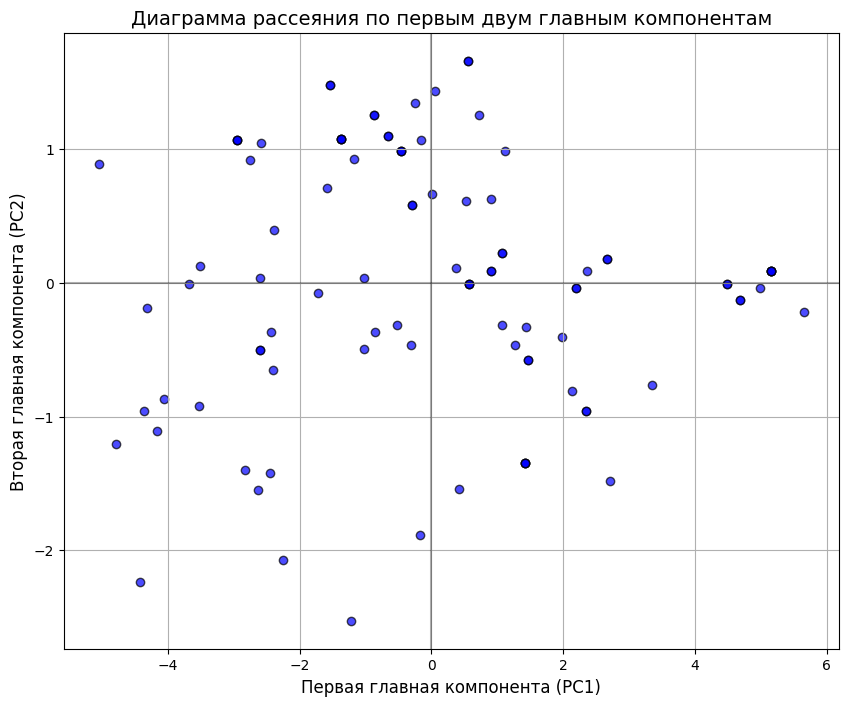

In [60]:
# Построение диаграммы рассеяния по первым двум главным компонентам
plt.figure(figsize=(10, 8))

vector_scale = 0.5
text_scale = 0.6

# for i in range(K):
#     plt.arrow(0, 0, eigenvectors[i, 0] * max(abs(Z[:, 0])) * vector_scale, 
#              eigenvectors[i, 1] * max(abs(Z[:, 1])) * vector_scale, 
#              head_width=0.05, head_length=0.05, fc='red', ec='red', linewidth=1.5)
    
#     plt.text(eigenvectors[i, 0] * max(abs(Z[:, 0])) * text_scale, 
#             eigenvectors[i, 1] * max(abs(Z[:, 1])) * text_scale, 
#             f'F{i+1}', color='green', ha='center', va='center', fontsize=12, fontweight='bold')
    
plt.scatter(Z[:, 0], Z[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.xlabel("Первая главная компонента (PC1)", fontsize=12)
plt.ylabel("Вторая главная компонента (PC2)", fontsize=12)
plt.title("Диаграмма рассеяния по первым двум главным компонентам", fontsize=14)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()